<a href="https://colab.research.google.com/github/spsvision/AC_DC_Converter/blob/master/LSTM_stockPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) 
# to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

#Import the libraries
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
#Get the stock quote 
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-01-17') 
#Show the data 
df.shape

(2024, 6)

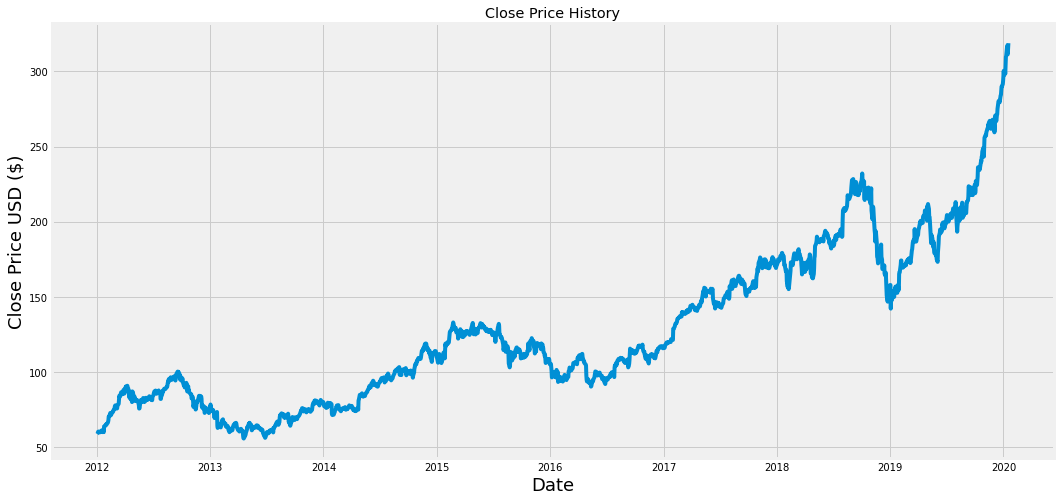

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [10]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
      print(x_train)
      print(y_train)

[array([0.01124645, 0.01244716, 0.01494094, 0.01731519, 0.01695117,
       0.01777156, 0.01739668, 0.01676645, 0.01590803, 0.0185648 ,
       0.02096078, 0.02022188, 0.01617425, 0.02003716, 0.01623401,
       0.03049582, 0.0293929 , 0.03083267, 0.03394581, 0.03583108,
       0.03567353, 0.0350922 , 0.03756967, 0.03990045, 0.04254094,
       0.0468059 , 0.05576503, 0.05590085, 0.06088842, 0.06461549,
       0.05820989, 0.06067652, 0.06062763, 0.06754393, 0.06656053,
       0.0683806 , 0.07165131, 0.07347141, 0.07871432, 0.08253377,
       0.08363666, 0.08402243, 0.07749189, 0.07591627, 0.07614991,
       0.08228926, 0.084017  , 0.08772776, 0.09647502, 0.10814526,
       0.10596116, 0.10596658, 0.11440415, 0.11704461, 0.11516477,
       0.11344794, 0.11166045, 0.11759878, 0.1216736 , 0.12337958])]
[0.11916351268174252]


In [11]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [12]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [13]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1560/1560 [==============================] - 37s 24ms/step - loss: 4.9016e-04


In [15]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [16]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [17]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

16.524655139830315

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


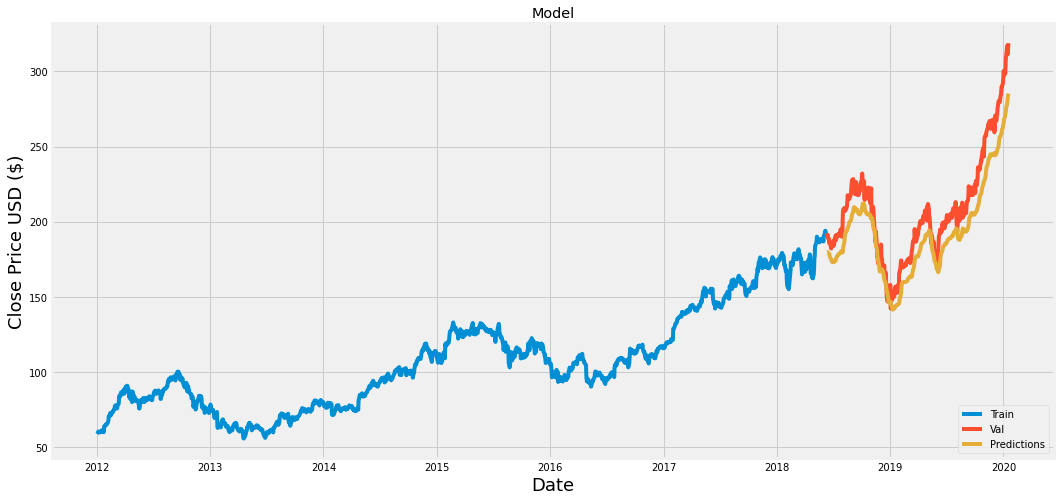

In [18]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-06-12,192.279999,179.780106
2018-06-13,190.699997,179.834656
2018-06-14,190.800003,179.658417
2018-06-15,188.839996,179.425522
2018-06-18,188.740005,178.932327
...,...,...
2020-01-13,316.959991,278.167847
2020-01-14,312.679993,280.951477
2020-01-15,311.339996,282.906097


In [34]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-01-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[143.81886]]


In [35]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-1-18', end='2019-1-18')
print(apple_quote2['Close'])

Date
2019-01-18    156.820007
Name: Close, dtype: float64
